In [1]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Final Report

Create an electronic report in English with a maximum of 2000 words (excluding citations) using Jupyter. The report should include the posed question, conducted analysis, and derived conclusion. Only one team member needs to submit this report. It is not required to include all tasks completed by every group member in their individual assignments; tailor the final report to the collective group's work. Make sure to reach a consensus among all team members on the final content of the report. If needed, consult your TA and Instructor for further guidance.

You must submit 2 files:

- an .html file (File -> Download As -> HTML)
- an .ipynb file. This file must be fully reproducible. It must run completely from top to bottom without any additional files.

## How Many Hours Would a Player Contribute Given Their “Age”?

## Introduction

As youth continue to grow up in a technology enriched world, their interactions with technological entertainment will continue to increase. The engagement with technological entertainment such as video games, may want to be studied as people continue to play. Many studies conduct research about the effect of youth and video games, and whether more concern should be voiced regarding how often young kids interact with them. Witt et al. (2011) discuss if personality and self-esteem have an effect on video games and overall internet use. While they find there is a correlation, they also find that youth increase internet usage as they develop but decrease the amount of time they spend playing video games. However, Rehbein and Baier’s (2013) study highlights the concern of video games becoming addictive in youth, discussing problematic use of video games, specific risk factors, and its correlation to gaining a gaming addiction. Both studies shine light on the question of youth and video games. Should one be concerned over young kids and their play time or is gaming a normal activity that people in adulthood can indulge in just as regularly. The question then follows, how many hours does a player contribute to a video game given their age? 

The Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia has begun a project to examine the relationship between video games like Minecraft, with the power of artificial intelligence. We can then utilize its data regarding the age of players and how many hours they contribute to the game, to discover if we can predict whether players of a certain age will play more or less. The dataset used to answer our question is the players dataset, involving information of the players’ characteristics. The dataset includes the following information such as a player’s experience level (“veteran” as the most experienced with Minecraft and “beginner” as the least), whether a player is subscribed, a player’s encrypted email, the total amount of hours played, the player’s nickname, the player’s gender, and the player’s age. A model can thus be made using the age and playing hours data to examine if a relationship is present and thus, if we can predict a player’s play time from how old they are.

## Exploratory Data Analysis

The data was loaded by retrieving the data on the github repository, and relavent columns are selected.

In [2]:
players_df = pd.read_csv('https://raw.githubusercontent.com/Caden-Z/DSCI100-Term-Project/refs/heads/main/data/players.csv')
players_df = players_df[['age', 'played_hours']]
players_df.head()

,age,played_hours
0,9,30.3
1,17,3.8
2,17,0.0
3,21,0.7
4,21,0.1


The dataframe is inspected for any missing values, result showed that there is no null values in the given observations.

In [3]:
missing_players = players_df.isnull().sum()
print("Missing values in key columns:")
print(missing_players)

Missing values in key columns:
age             0
played_hours    0
dtype: int64


The relationship between the relavent variables are visualized and inspected via graphs.

In [4]:
played_hours_chart = alt.Chart(players_df).mark_bar().encode(
    alt.X('played_hours:Q', bin=alt.Bin(maxbins=20), title='Played Hours (hours)'),
    alt.Y('count()', title='Play Time')
).properties(
    title={'text': 'Distribution of Played Hours',
           'subtitle': 'Figure 1.1'},
    width=400,
    height=300
)

age_distribution_chart = alt.Chart(players_df).mark_bar().encode(
    alt.X('age:Q', bin=alt.Bin(maxbins=10), title='Age (years)'),
    alt.Y('count()', title='Play Time')
).properties(
    title={'text': 'Age Distribution of Players',
            'subtitle': 'Figure 1.2'},
    width=400,
    height=300
)

scatter_chart = alt.Chart(players_df).mark_circle(size=60).encode(
    alt.X('age:Q', title='Age (years)'),
    alt.Y('played_hours:Q', title='Played Hours (hours)'),
    tooltip=['age', 'played_hours']
).properties(
    title={'text': 'Scatter Plot of Age vs. Played Hours',
           'subtitle': 'Figure 1.3'},
    width=400,
    height=300
)

played_hours_chart & age_distribution_chart & scatter_chart

alt.VConcatChart(...)

The predictor and response columns were selected and stored in variables X and y for both the training set and testing set.

In addition, training and testing data split was made at the start to avoid model training with the test data that is used to evaluate the model’s performance after training.

In [5]:
train_df, test_df = train_test_split(players_df, test_size=0.25, random_state=42)

X_train = train_df[["age"]]
y_train = train_df["played_hours"]

X_test = test_df[["age"]]
y_test = test_df["played_hours"]

X_train.head()

,age
162,19
42,24
66,22
135,21
78,22


In [6]:
X_test.head()

,age
139,20
113,17
16,17
75,21
154,19


## Methods

### Linear Regression Model

The linear regression model was created and fitted with the training data. 

Although no preprocessor was needed for this model because:
- There are no NaN observations, so no imputer is needed to synthesize the missing values.
- There is only 1 predictor variable, thus no scaling is needed to standardize the unit between variables to remove the impact of different scales of different variables.

The preprocessor is still used for good practice and in case more predictors are needed in the future.

In [7]:
lr_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')), 
            ('scaler', StandardScaler())                 
        ]), ['age'])                                     
    ]
)

lr_pipeline = Pipeline(steps=[
    ('preprocessor', lr_preprocessor),
    ('regressor', LinearRegression())  
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age'])])),
                ('regressor', LinearRegression())])

The linear regression model was evaluated using both RMSE and RMSPE.

In [8]:
lr_train_predictions = lr_pipeline.predict(X_train)
lr_test_predictions = lr_pipeline.predict(X_test)

lr_train_rmse = root_mean_squared_error(y_train, lr_train_predictions)
lr_test_rmspe = root_mean_squared_error(y_test, lr_test_predictions)

print("Linear Regression Training RMSE:", lr_train_rmse)
print("Linear Regression Test RMSPE:", lr_test_rmspe)

Linear Regression Training RMSE: 32.339101959393936
Linear Regression Test RMSPE: 8.00126786800662


Data frames were prepared with predicted values to be graphed

In [9]:
lr_players_predictions_train = train_df.assign(predicted=lr_train_predictions, set="Train")
lr_players_predictions_test = test_df.assign(predicted=lr_test_predictions, set="Test")

lr_combined_data = pd.concat([lr_players_predictions_train, lr_players_predictions_test], ignore_index=True)

# display only 5 columns
lr_combined_data.sample(n=5, random_state=42)

,age,played_hours,predicted,set
139,8,0.3,9.672875,Train
113,22,2.7,7.246634,Train
16,17,0.1,8.113149,Train
75,17,0.0,8.113149,Train
154,20,0.0,7.593240,Test


A scatter representing predicted vs. actual values were plotted to visaluze the performance of the model.

In [10]:
actual_vs_predicted = alt.Chart(lr_combined_data).mark_circle(size=60, opacity=0.7).encode(
    x=alt.X('played_hours', title='Actual Values'),
    y=alt.Y('predicted', title='Predicted Values'),
    color=alt.Color('set', scale=alt.Scale(domain=['Train', 'Test'], range=['blue', 'orange']), title='Dataset'),
    tooltip=['played_hours', 'predicted', 'set']
).properties(
    title={'text': 'Actual vs Predicted Values for Training and Testing Sets',
           'subtitle': 'Figure 2.1'},
    width=600,
    height=400
)

actual_vs_predicted

alt.Chart(...)

In addition to the actual vs. predicted graph, a graph representing the linear line produced by the linear regression model is overlayed with the orinal data graph to better visualize the model's performance. 

In [11]:
lr_chart = (scatter_chart + 
            alt.Chart(lr_combined_data).mark_line(color="orange").encode(
                x="age",
                y="predicted"
            )
).properties(
    title={
        "text": "Linear Regression: Age vs. Predicted Values",
        "subtitle": "Figure 2.2"
    },
    width=400,
    height=300
)

lr_chart

alt.LayerChart(...)

It can be seen that there are prevalent outliers in this data set that impacts the performance of the linear regression model, as they do not represent the amount of hours played in others of similar age. To accommodate, the outliers were removed by only analyzing and training using players who have played under 10 hours and are under the age of 60.

In [12]:
train_df, test_df = train_test_split(players_df[(players_df["played_hours"] < 10) & (players_df["age"] < 60)], test_size=0.25, random_state=42)

X_train = train_df[["age"]]
y_train = train_df["played_hours"]

X_test = test_df[["age"]]
y_test = test_df["played_hours"]

lr_pipeline.fit(X_train, y_train)

lr_train_predictions = lr_pipeline.predict(X_train)
lr_test_predictions = lr_pipeline.predict(X_test)

lr_train_rmse = root_mean_squared_error(y_train, lr_train_predictions)
lr_test_rmspe = root_mean_squared_error(y_test, lr_test_predictions)

print("Linear Regression Training RMSE:", lr_train_rmse)
print("Linear Regression Test RMSPE:", lr_test_rmspe)

Linear Regression Training RMSE: 1.0676593236098022
Linear Regression Test RMSPE: 0.710615929075977


In [13]:
lr_players_predictions_train = train_df.assign(predicted=lr_train_predictions, set="Train")
lr_players_predictions_test = test_df.assign(predicted=lr_test_predictions, set="Test")

lr_combined_data = pd.concat([lr_players_predictions_train, lr_players_predictions_test], ignore_index=True)

# display only 5 columns
lr_combined_data.sample(n=5, random_state=42)

lr_chart = alt.Chart(lr_combined_data).mark_circle(size=60, opacity=0.5).encode(
    alt.X('age:Q', title='Age (years)').scale(zero=False),
    alt.Y('played_hours:Q', title='Play Time (hours)'),
    tooltip=['age', 'played_hours']
).properties(
    title={'text': 'Scatter Plot of Age vs. Played Hours',
           'subtitle': 'Figure 2.3'},
    width=400,
    height=300
) + alt.Chart(lr_combined_data).mark_line(color="orange").encode(
    x="age",
    y="predicted"
)

lr_chart

alt.LayerChart(...)

### KNeighbors Regression Model

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())                 
])

knn_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age'])  
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', knn_preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5)) 
])

In [15]:
# Optimizing best k value
param_grid = {'regressor__n_neighbors': range(1, 21)}  # Test k values from 1 to 20
grid_search = GridSearchCV(knn_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': range(1, 21)},
             scoring='neg_root_mean_squared_error')

In [16]:
best_k = grid_search.best_params_['regressor__n_neighbors']
best_rmse = -grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best Cross-Validated RMSE: {best_rmse:.4f}")

Best k value: 20
Best Cross-Validated RMSE: 1.0569


In [17]:
knn_pipeline.set_params(regressor__n_neighbors=best_k)
knn_pipeline.fit(X_train, y_train)

knn_train_predictions = knn_pipeline.predict(X_train)
knn_test_predictions = knn_pipeline.predict(X_test)

knn_train_rmse = root_mean_squared_error(y_train, knn_train_predictions)
knn_test_rmspe = root_mean_squared_error(y_test, knn_test_predictions)

print("KNN Regressor Training RMSE:", knn_train_rmse)
print("KNN Regressor Test RMSPE:", knn_test_rmspe)

KNN Regressor Training RMSE: 1.0859112916501665
KNN Regressor Test RMSPE: 0.8368776077986451


In [18]:
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': knn_train_predictions, 'Set': 'Train'})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': knn_test_predictions, 'Set': 'Test'})
knn_combined_data = pd.concat([train_data, test_data], ignore_index=True)

knn_combined_data.sample(n=5, random_state=42)

,Actual,Predicted,Set
19,2.7,0.610,Train
42,0.1,0.390,Train
153,0.0,0.535,Test
78,0.2,0.535,Train
145,0.0,0.925,Test


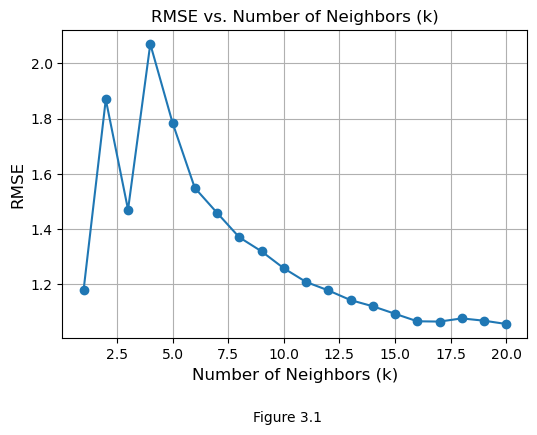

In [19]:
k_values = range(1, 21)
mean_rmse = -grid_search.cv_results_['mean_test_score']

# Plot RMSE vs. k
plt.figure(figsize=(6, 4))
plt.plot(k_values, mean_rmse, marker='o')
plt.title('RMSE vs. Number of Neighbors (k)', fontsize=12)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(True)
plt.figtext(0.5, -0.1, 'Figure 3.1', 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [20]:
train_data['Set'] = 'Train'
test_data['Set'] = 'Test'
knn_combined_data = pd.concat([train_data, test_data])

actual_vs_predicted_with_trend = alt.Chart(knn_combined_data).mark_circle(size=60).encode(
    x=alt.X('Actual', title='Actual Values'),
    y=alt.Y('Predicted', title='Predicted Values'),
    color=alt.Color('Set', scale=alt.Scale(domain=['Train', 'Test'], range=['blue', 'orange'])),
    tooltip=['Actual', 'Predicted', 'Set']
).properties(
    title={'text': 'Actual vs Predicted Values with Trend Line',
           'subtitle': 'Figure 3.2'},
    width=600,
    height=400
) + alt.Chart(knn_combined_data).transform_regression('Actual', 'Predicted').mark_line(color='green').encode(
    x='Actual',
    y='Predicted'
)

actual_vs_predicted_with_trend

alt.LayerChart(...)

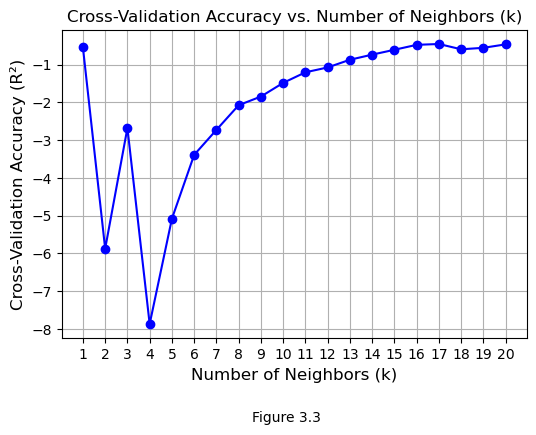

In [21]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn_model = Pipeline(steps=[
        ('preprocessor', knn_preprocessor),
        ('regressor', KNeighborsRegressor(n_neighbors=k))
    ])
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='r2')
    accuracy_scores.append(np.mean(scores))

plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)', fontsize=12)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy (R²)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.figtext(0.5, -0.1, 'Figure 3.3', 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

## Results

#### Linear Regression
- The linear regression model was trained to explore the relationship between age and played hours.
- The RMSE for the training set was 1.07, and the RMSE for the testing set was 0.71, indicating better predictive performance compared to initial expectations.
- Despite the relatively low RMSE values, the scatter plot of actual vs. predicted values highlighted deviations from the ideal trend, suggesting that the model does not fully capture the variability in played hours.
- These results suggest that while linear regression performs reasonably well, the relationship between age and played hours may still involve non-linear factors or additional predictors.

#### KNeighbors Regressor
- The KNN model was evaluated using different k values, and its performance stabilized at higher 
𝑘
k values (e.g., 
𝑘
=
20
k=20).

## Discussion
#### Summary of Findings
  - Distribution of Played Hours: The data shows a highly skewed distribution of played hours, with the majority of players spending less than 20 hours. Very few players have high playtimes (above 100 hours).
  - Age Distribution of Players: The age distribution indicates that most players are concentrated in the 10–30 years age range, with very few outliers above 50 years. This is consistent with gaming being more popular among younger demographics.
  - There is no strong linear relationship between age and played hours, but the scatter shows a concentration of lower played hours across all age groups, with a few outliers spending significantly more time.
  - The linear regression model demonstrates a weak predictive capability, with the predicted values deviating significantly from the actual values. This further emphasizes the insufficiency of using only "age" as a feature for modeling played hours, as the relationship appears non-linear and complex.
  - The KNN model’s performance, as measured by RMSE, improves with higher values of k, stabilizing around k=20. However, the model struggles to achieve high accuracy, as indicated by low cross-validation scores. This implies that "age" alone is not a strong predictor of played hours.
  - Cross-validation scores for both models (KNN and LR) remain low, highlighting the challenges in predicting played hours using a single feature. This indicates the need for additional predictors to improve the model's performance.
  - The findings indicate a clear trend of younger individuals forming the majority of the gaming audience, with a highly uneven distribution of engagement levels (playtime). The predictive models highlight challenges in deriving meaningful insights from the dataset using the available features.

#### Was this expected?

The expectation was that individuals below the age of 13 and those above 40 would engage in minimal gaming, with the majority of gaming activity concentrated in the 13–40 age range. The findings partially align with this expectation, as the data shows that most players are within the 10–30 age group, indicating high engagement among younger individuals. However, there are some notable outliers, such as younger children and older individuals, who exhibit significant gaming hours. These exceptions suggest that while the overall trend holds true, gaming behaviors may vary due to individual preferences, access to technology, or other factors not captured in the dataset.

#### Impact of findings
 - Identifying the dominance of younger players can help game developers tailor marketing campaigns and content for this demographic.
 - The skewed playtime distribution suggests a majority of casual players, indicating potential for designing more engaging short-term game features to boost player retention.
 - The weak relationship between age and played hours emphasizes the need to include more features (e.g., game genre preferences, availability, or personality traits) for better prediction models.

#### Future Questions
- What additional features (e.g., income level, device type, time spent on other activities) could improve the model's predictive performance?
- How does feature engineering (e.g., interaction terms or polynomial features) impact the performance of simpler models like Linear Regression?
- Could advanced models like Random Forest or Gradient Boosting capture non-linear patterns better than KNN?
- Is there a significant difference in gaming behavior based on gender, socioeconomic status, or education level?

## References
- Rehbein, F., & Baier, D. (2013). Family-, media-, and school-related risk factors of video game addiction: A 5-year longitudinal study. Journal of Media Psychology, 25(3), 118-128. https://doi.org/10.1027/1864-1105/a00009

- Witt, E. A., Massman, A. J., & Jackson, L. A. (2011). Trends in youth’s videogame playing, overall computer use, and communication technology use: The impact of self-esteem and the big five personality factors. Computers in Human Behavior, 27(2), 763-769. https://doi.org/10.1016/j.chb.2010.10.025